In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
Sales = pd.read_csv("sales.csv")
Features = pd.read_csv("features.csv")
Stores = pd.read_csv("stores.csv")

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:
ct = ColumnTransformer(transformers=[("transformer",OneHotEncoder(),[1])],remainder="passthrough")
Stores = ct.fit_transform(Stores)
Stores = pd.DataFrame(Stores,columns=["A","B","C","Store","Size"])
Stores = Stores.drop(["Store"],axis=1)

In [5]:
Sales = Sales.groupby(by=["Store","Date"]).sum()
Sales.drop(["Dept","IsHoliday"],axis=1,inplace=True)
Sales = Sales.reset_index()
Sales = Sales["Weekly_Sales"]

In [6]:
enc = OrdinalEncoder()
enc = OrdinalEncoder()
Features[["Date"]] = enc.fit_transform(Features[["Date"]])
separation_date = enc.transform([["2012-10-26"]])[0][0]
print(separation_date)


142.0


c:\Users\hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [7]:
Features_without_sales = Features[Features["Date"] >separation_date]
Features = Features[Features["Date"]<=separation_date]
Features = Features.reset_index()
Features=Features.drop(["index"],axis=1)
Features_without_sales = Features_without_sales.reset_index()
Features_without_sales = Features_without_sales.drop(["index"],axis=1)

In [8]:
Features["Date"] = np.log2(Features["Date"]+1)
print(Features["Date"])

0       0.000000
1       1.000000
2       1.584963
3       2.000000
4       2.321928
          ...   
6430    7.118941
6431    7.129283
6432    7.139551
6433    7.149747
6434    7.159871
Name: Date, Length: 6435, dtype: float64


In [9]:
lst = []
store_columns = Stores.columns
columns = list(Features.columns) + list(store_columns)
Stores = Stores.values
for i in Features.values:
    i = list(i)
    i.extend(Stores[i[0]-1])
    lst.append(i)
Features = pd.DataFrame(lst,columns=columns)
print(Features)

      Store      Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  0.000000        42.31       2.572        NaN        NaN   
1         1  1.000000        38.51       2.548        NaN        NaN   
2         1  1.584963        39.93       2.514        NaN        NaN   
3         1  2.000000        46.63       2.561        NaN        NaN   
4         1  2.321928        46.50       2.625        NaN        NaN   
...     ...       ...          ...         ...        ...        ...   
6430     45  7.118941        64.88       3.997    4556.61      20.64   
6431     45  7.129283        64.89       3.985    5046.74        NaN   
6432     45  7.139551        54.47       4.000    1956.28        NaN   
6433     45  7.149747        56.47       3.969    2004.02        NaN   
6434     45  7.159871        58.85       3.882    4018.91      58.08   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0           NaN        NaN        NaN  211.096358        

In [10]:
lst = []
columns = list(Features_without_sales.columns) + list(store_columns)
for i in Features_without_sales.values:
    i = list(i)
    i.extend(Stores[i[0]-1])
    lst.append(i)
Features_without_sales = pd.DataFrame(lst,columns=columns)
Features_without_sales = pd.DataFrame(lst,columns=columns)

print(Features_without_sales)

      Store   Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0         1  143.0        55.32       3.386    6766.44    5147.70      50.82   
1         1  144.0        61.24       3.314   11421.32    3370.89      40.28   
2         1  145.0        52.92       3.252    9696.28     292.10     103.78   
3         1  146.0        56.23       3.211     883.59       4.17   74910.32   
4         1  147.0        52.34       3.207    2460.03        NaN    3838.35   
...     ...    ...          ...         ...        ...        ...        ...   
1750     45  177.0        76.05       3.639    4842.29     975.03       3.00   
1751     45  178.0        77.50       3.614    9090.48    2268.58     582.74   
1752     45  179.0        79.37       3.614    3789.94    1827.31      85.72   
1753     45  180.0        82.84       3.737    2961.49    1047.07     204.19   
1754     45  181.0        76.06       3.804     212.02     851.73       2.06   

      MarkDown4  MarkDown5         CPI 

In [11]:
print(pd.isnull(Features).sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
A                  0
B                  0
C                  0
Size               0
dtype: int64


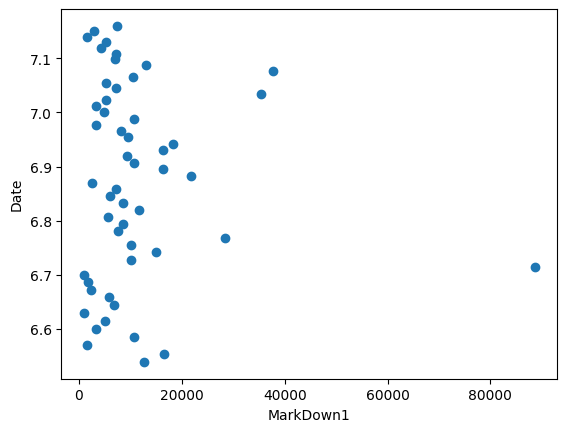

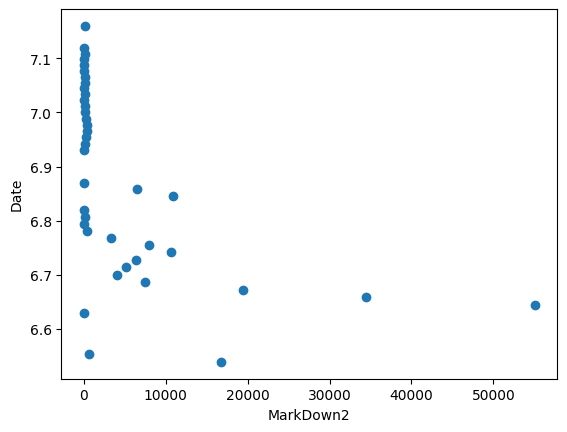

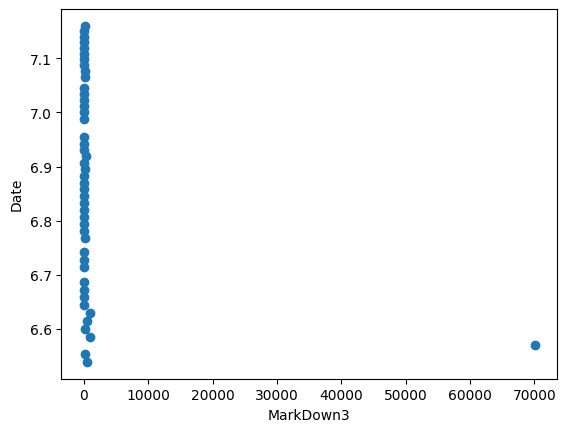

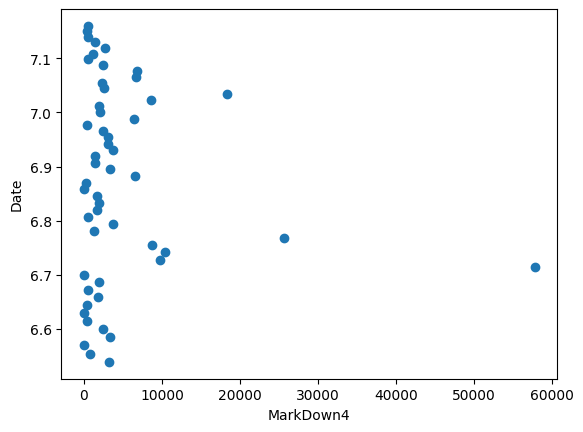

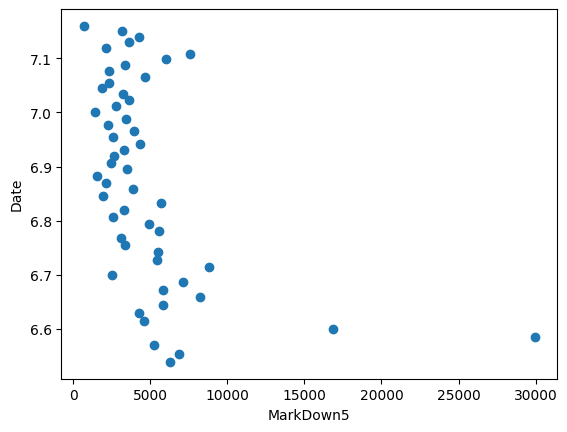

In [12]:
Features["Sales"] = Sales
Features_for_Store1= Features[Features["Store"] == 22]
for i in ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]:
    plt.xlabel(i)
    plt.ylabel("Date")
    plt.scatter(Features_for_Store1[i],Features_for_Store1["Date"])
    plt.show()

In [13]:
Features_without_sales=Features_without_sales.drop(["Store"],axis=1)
Features=Features.drop(["Store"],axis=1)

In [14]:
Y = Features["Sales"]
Features = Features.drop(["Sales"],axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Features,Y,random_state=3,test_size=0.3)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train=imputer.fit_transform(X_train)
X_train = scale.fit_transform(X_train)
print(X_train)

[[ 0.11594649  0.52357514  0.24596863 ... -0.78971397  2.56067315
  -1.37128733]
 [ 0.30965807  0.14412476  0.74977934 ... -0.78971397 -0.39052231
   1.42246083]
 [ 0.40823608  0.9524954   1.05075718 ...  1.26628125 -0.39052231
  -0.18135755]
 ...
 [-0.51923868 -0.02113729 -1.12151761 ... -0.78971397 -0.39052231
   1.17251121]
 [ 0.81637662  0.32787007  1.87953671 ...  1.26628125 -0.39052231
  -0.27598823]
 [ 0.95366049  1.63528862  0.98314621 ... -0.78971397  2.56067315
  -1.42345045]]


In [17]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [18]:
from xgboost import XGBRegressor
xgboost = XGBRegressor()
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
X_test = imputer.transform(X_test)
X_test = scale.transform(X_test)

In [20]:
xgboost.score(X_test,y_test)

0.9756260243358488

In [21]:
random_forest.score(X_test,y_test)

0.9371120785233188

In [22]:
from sklearn.metrics import r2_score
preds_xgb = xgboost.predict(X_test)
print("Xgboost score: "+str(r2_score(y_test, preds_xgb)))
preds_random_forest = random_forest.predict(X_test)
print("Random Forest: "+str(r2_score(y_test, preds_random_forest)))

Xgboost score: 0.9756260243358488
Random Forest: 0.9371120785233188


In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
cols = Features.columns
Features=imputer.fit_transform(Features)
Features = scale.transform(Features)
Features = pd.DataFrame(Features,columns=cols)
print(Features)

          Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0    -4.234181    -0.999663   -1.719111   0.035874   0.050138  -0.041602   
1    -3.497731    -1.206240   -1.771455   0.035874   0.050138  -0.041602   
2    -3.066936    -1.129045   -1.845609   0.035874   0.050138  -0.041602   
3    -2.761281    -0.764817   -1.743102   0.035874   0.050138  -0.041602   
4    -2.524198    -0.771884   -1.603518   0.035874   0.050138  -0.041602   
...        ...          ...         ...        ...        ...        ...   
6430  1.008561     0.227299    1.388812  -0.461218  -0.667091  -0.276117   
6431  1.016177     0.227843    1.362640  -0.355241   0.050138  -0.273104   
6432  1.023739    -0.338614    1.395355  -1.023470   0.050138  -0.275006   
6433  1.031248    -0.229889    1.327744  -1.013148   0.050138  -0.275825   
6434  1.038704    -0.100507    1.137997  -0.577482  -0.658695  -0.258985   

      MarkDown4  MarkDown5       CPI  Unemployment  IsHoliday         A  \
0      0.015

In [24]:
from sklearn.model_selection import cross_val_score
model3 = XGBRegressor()
sklearn.metrics.get_scorer_names()
print(cross_val_score(model3,Features,Sales))

[ 0.6793103   0.57526651 -0.58337168 -0.86497726  0.26428455]
